### 1) Read the image and Call it I_orig. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
% matplotlib inline

Text(0.5,1,'Input Image')

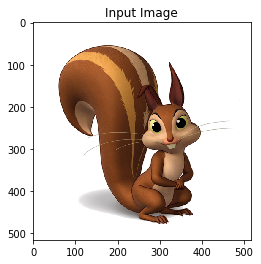

In [4]:
# reading an image

I_orig = cv2.imread('./images/1.png')

# plotting input image

plt.imshow(cv2.cvtColor(I_orig,cv2.COLOR_RGB2BGR))
plt.title('Input Image')



### a) Interpolate using “Nearest Neighbour” by factor 4. Call it I_NN

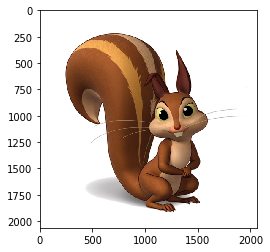

In [5]:
# Applying interepolation by a factor of 4 on I_orig

height, width = I_orig.shape[:2]
I_NN = cv2.resize(I_orig,(4*width, 4*height), interpolation = cv2.INTER_NEAREST) 
plt.imshow(cv2.cvtColor(I_NN,cv2.COLOR_RGB2BGR)) 





### Observation 
- image is pixelated becauese neareset neighbour interpolation just copies or repeats the pixel values from the nearest neighbours

### b) Interpolate using “Bilinear” by factor 4. Call it I_BL

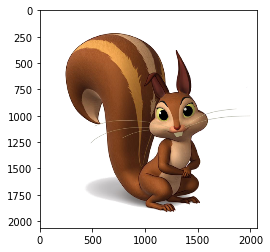

In [6]:
# Applying interepolation by a factor of 4 on I_orig
height, width = I_orig.shape[:2]
I_BL = cv2.resize(I_orig,(4*width, 4*height), interpolation = cv2.INTER_LINEAR) # bilinear is a default technique in opencv
plt.imshow(cv2.cvtColor(I_BL,cv2.COLOR_RGB2BGR))

### Observations : 
- It is better than nearest neighbour approach but its not the best interpolation technique
- we can still see some uneven edges in the image : because it is linear approximation 
* we can improve this by fitting a higher order polynomial such as cubic interpolation

Text(0.5,1,'BiLinear Interpolation')

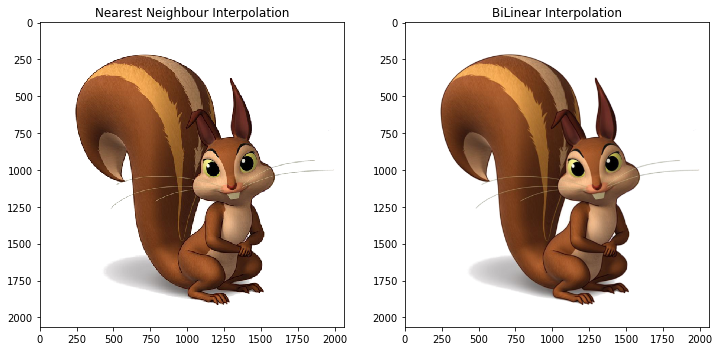

In [22]:
# lets compare the interpolated images together


f2, axarr2 = plt.subplots(nrows = 1, ncols = 2,figsize = (12,12))
axarr2[0].imshow(cv2.cvtColor(I_NN,cv2.COLOR_RGB2BGR)) ; axarr2[0].set_title('Nearest Neighbour Interpolation')
axarr2[1].imshow(cv2.cvtColor(I_BL,cv2.COLOR_RGB2BGR)) ; axarr2[1].set_title('BiLinear Interpolation')

### Observation :
#### Above we can see the differnece between two interpolation technique : In bilinear Interpolation edges are smoother whereas in nearest neighbour interpolation ,it is pixelated

### (c) Obtain the Fourier Transform of I_NN, call it F_NN. Obtain the Fourier Transform of I_BL, call it F_BL.     
     1.compare their respective PSDs.
     2.Also plot the variation of the “Energy fraction in frequency domain against the “Distance from the Origin (in frequency domain)”

    Do you notice anything that can help you conclude which of the two interpolation techniques is superior ?

In [11]:
# converting images to gray image

I_NN_gray = cv2.cvtColor(I_NN , cv2.COLOR_BGR2GRAY)
I_BL_gray = cv2.cvtColor(I_BL , cv2.COLOR_BGR2GRAY)


### fun to calculate the fourier transform of an image

In [12]:
def fft(img):
    fft = np.fft.fft2(img)           
    fft_shift = np.fft.fftshift(fft)
    
    return fft_shift 

def mag_ph(fft_img):
    fft_shift = fft_img
    magnitude_spectrum = 20*np.log(0.00001+np.abs(fft_shift))
    phase_spectrum = np.angle(fft_shift)
    
    return magnitude_spectrum, phase_spectrum          

### function to find PSD (power spectrum density / power spectrum)
#### psd = [ abs(fourier of an img) ]**2

In [13]:
def psd(mag):
    power_spec = mag ** 2
    return power_spec

In [14]:
# taking fourier transform of an image

F_NN = fft(I_NN_gray)
F_BL = fft(I_BL_gray)

mag_NN,ph_NN = mag_ph(F_NN)
mag_BL,ph_BL = mag_ph(F_BL)

In [15]:
# caluculating power spectrum of an image

I_NN_psd = psd(mag_NN)
I_BL_psd = psd(mag_BL)

### comparision of PSDs of both the images

Text(0.5,1,'I_BL_psd')

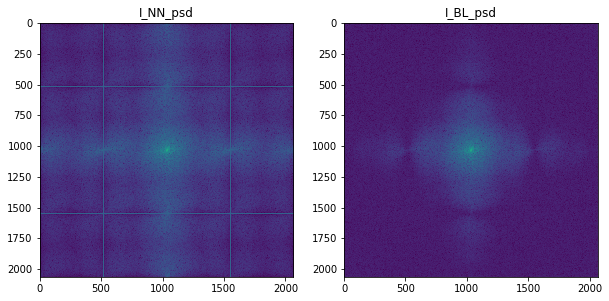

In [21]:
# plotting

f2, axarr2 = plt.subplots(nrows = 1, ncols = 2,figsize = (10,10))
axarr2[0].imshow(I_NN_psd) ; axarr2[0].set_title('I_NN_psd')
axarr2[1].imshow(I_BL_psd) ; axarr2[1].set_title('I_BL_psd')

### Observation :
 
- power spectrum shows the variation in frequencies ( energy ) 
- As we can see in Nearest Neighbour PSD variations are less because pixel values are repeated 
- And in BI Linear PSD variation in frequency is more as you go far from origin

### Plot the variation of the “Energy fraction in frequency domain” against the “Distance from the Origin (in frequency domain)”

In [17]:
def CircularMask(ht, wt, center=None, radius=None):
    if radius is None:
        radius = min(center[0], center[1], w-center[0], h-center[1])
    Y, X = np.ogrid[:ht, :wt]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask = dist_from_center <= radius
    return mask

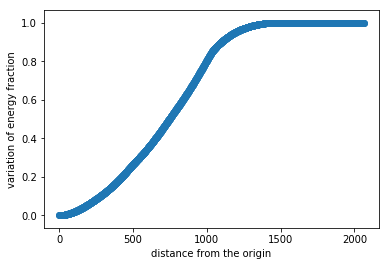

In [19]:
energy_nearest = []
for i in range(np.min(I_NN_gray.shape)):
    nrows, ncols = I_NN_gray.shape
    crow,ccol = int(nrows/2) , int(ncols/2)
    ht, wt = I_NN_gray.shape[:2]
    radius = i
    mask = CircularMask(ht, wt,[ccol, crow], radius)
    mask2 = mag_NN.copy()
    mask2 = mask2*mask
    e = mask2**2
    energy_nearest.append(np.sum(e))

energy_nearest_fraction = energy_nearest/(np.sum(mag_NN**2))
r = [i for i in range(np.min(I_NN_gray.shape))]
plt.scatter(r, energy_nearest_fraction)
plt.xlabel('distance from the origin')
plt.ylabel('variation of energy fraction')
plt.show()
plt.savefig("fractional_energy_nearest.png")

### Observation : in case of NN Interpolation , as we move away from the origin , variation in energy fraction in freqn domain is increasing but not constantly

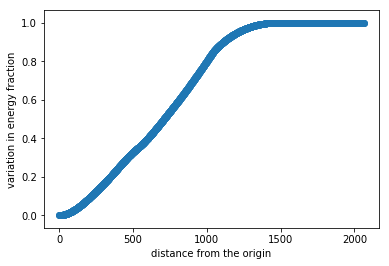

In [21]:
energy_bilinear = []
for i in range(np.min(I_BL_gray.shape)):
    nrows, ncols = I_BL_gray.shape
    crow,ccol = int(nrows/2) , int(ncols/2)
    ht, wt = I_BL_gray.shape[:2]
    radius = i
    mask = CircularMask(ht, wt,[ccol, crow], radius)
    mask2 = mag_BL.copy()
    mask2 = mask2*mask
    e = mask2**2
    energy_bilinear.append(np.sum(e))

energy_bilinear_fraction = energy_bilinear/(np.sum(mag_BL**2))
r = [i for i in range(np.min(I_BL_gray.shape))]

plt.scatter(r, energy_bilinear_fraction)
plt.xlabel('distance from the origin')
plt.ylabel('variation in energy fraction')
plt.show()
plt.savefig("fractional_energy_bilinear.png")

### Observation : 
here as we move away from origin , variation in freqn domain is increasing constantly